# The code provided builds and trains a simple neural network on the MNIST dataset using the Keras library. The network is a fully connected feedforward neural network (also known as a Multi-Layer Perceptron, or MLP).

C:\Users\abdom\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)                      │ (None, 8)                     │       6,280 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 8)                     │          72 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 10)                    │          90 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 6,442 (25.16 KB)

 Trainable params: 6,442 (25.16 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 771us/step - accuracy: 0.1496 - loss: 2.3167
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.3447 - loss: 2.2248
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.4227 - loss: 2.0664
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.4471 - loss: 1.8002
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.5155 - loss: 1.5572
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.5922 - loss: 1.3808
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.6465 - loss: 1.2494
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.6876 - loss: 1.1427
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.7214 - loss: 1.0549
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.7531 - loss: 0.9721
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.7796 - loss: 0.8982
Epo

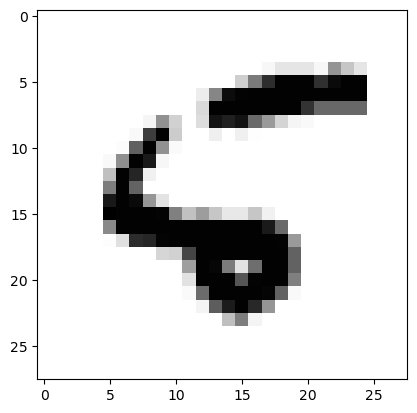

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train_data, Y_train_data), (X_test_data, Y_test_data) = mnist.load_data()
N = X_train_data.shape[0]  # N = 60 000 données

X_train = np.reshape(X_train_data, (N, 784))  # vecteur image
X_train = X_train / 255  # normalisation

Y_train = to_categorical(Y_train_data, num_classes=10)

X_test = np.reshape(X_test_data, (X_test_data.shape[0], 784))
X_test = X_test / 255
Y_test = to_categorical(Y_test_data, num_classes=10)

modele = Sequential()

modele.add(Dense(8, input_dim=784, activation='sigmoid'))

modele.add(Dense(8, activation='sigmoid'))

modele.add(Dense(10, activation='softmax'))

modele.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

print(modele.summary())

modele.fit(X_train, Y_train, batch_size=32, epochs=50)

resultat = modele.evaluate(X_test, Y_test, verbose=0)
print('Valeur de l''erreur sur les données de test (loss):', resultat[0])
print('Précision sur les données de test (accuracy):', resultat[1])

Y_predict = modele.predict(X_test)

i = 8 # numéro de l'image

chiffre_predit = np.argmax(Y_predict[i]) # prédiction par le réseau
print("Sortie réseau", Y_predict[i])
print("Chiffre attendu :", Y_test_data[i])
print("Chiffre prédit :", chiffre_predit)

plt.imshow(X_test_data[i], cmap='Greys')
plt.show()